# Regression Model



In [1]:
# importing libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf# regression modeling
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear modeling in scikit-learn
from sklearn.ensemble import RandomForestRegressor #RandomForest package


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


#file name
file = './database/Apprentice_Chef_Dataset_2023.xlsx'


# reading the file 
chef = pd.read_excel(file)

chef.head(n=5)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174


## Exploring through the Dataset

In [ ]:
#Database information 
chef.info(verbose = True)

It appears that the FAMILY_NAME have 46 values that are missing as we can see here
4   FAMILY_NAME  "1900" non-null   object . We can assume that the user didn't input their last name while they were inserting their information 
We will need treat that.
Concerning the other variable nothing is missing.
Mainly the dataset is composed of float, integer and object.


In [ ]:
chef.describe(include = 'number').round(2)

In [ ]:
# taking the chef dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per column
chef.isnull().sum(axis = 0)

In [2]:
#We have 46 value missing in the FAMILY_NAME.
#I will assume that this data was not insert and replace it
# instantiating an imputation value
fill = 'N/A'


# imputing 'FAMILY_NAME'
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna(fill)

In [ ]:
#verify that there is no more missing value in the database
chef.isnull().any().any()

There is no more null value in the dataset

## Data Classification 

Before going further I need to classify my data into 3 different categories it will help me through my analysis: 
* Continuous
* Interval/Count
* Categorical

In [ ]:
### CONTINIOUS
-----------

REVENUE (Y-Variable)
AVG_TIME_PER_SITE_VISIT
AVG_PREP_VID_TIME

### INTERVAL/COUNT 
--------------
TOTAL_MEALS_ORDERED
AVG_MEAN_RATING #AVG MEAL RATING typo mistake I need to fix it
LARGEST_ORDER_SIZE
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
CANCELLATIONS_AFTER_NOON
PC_LOGINS
MOBILE_LOGINS
WEEKLY_PLAN
LATE_DELIVERIES #typo mistake need to delete the space
TOTAL_PHOTOS_VIEWED

### CATEGORICAL
-----------

EMAIL
FIRST_NAME
FAMILY_NAME


In [3]:
#correctiong sintax error
chef['LATE_DELIVERIES'] = chef['LATE_DELIVERIES ']
chef['AVG_MEAL_RATING'] = chef['AVG_MEAN_RATING']


## Investigation relationship between revenue and continous  variable

In [35]:
#check the skewness of each features
chef.skew()

C:\Users\Kevin Kabore\AppData\Local\Temp\ipykernel_51424\3853607290.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  chef.skew()


REVENUE                               1.626573
TOTAL_MEALS_ORDERED                   2.006653
UNIQUE_MEALS_PURCH                    0.566015
CONTACTS_W_CUSTOMER_SERVICE           0.370833
PRODUCT_CATEGORIES_VIEWED             0.163797
AVG_TIME_PER_SITE_VISIT               1.200283
CANCELLATIONS_AFTER_NOON              1.436629
PC_LOGINS                            -0.038384
MOBILE_LOGINS                         0.052285
WEEKLY_PLAN                           1.538602
LATE_DELIVERIES                       1.709671
AVG_PREP_VID_TIME                     9.639388
LARGEST_ORDER_SIZE                    0.703995
AVG_MEAN_RATING                      -0.113411
TOTAL_PHOTOS_VIEWED                   2.604685
LATE_DELIVERIES                       1.709671
AVG_MEAL_RATING                      -0.113411
log_AVG_TIME_PER_SITE_VISIT          -0.063739
log_AVG_PREP_VID_TIME                -0.490844
log_REVENUE                           0.184090
log_TOTAL_MEALS_ORDERED              -0.283446
log_TOTAL_PHO

We will try to keep the skewness of our variables under 1. Many of our variables are skewed, so we will need to investigate and treat them for our analysis. We will investigate the skewness of our variables using histograms and scatter plot.

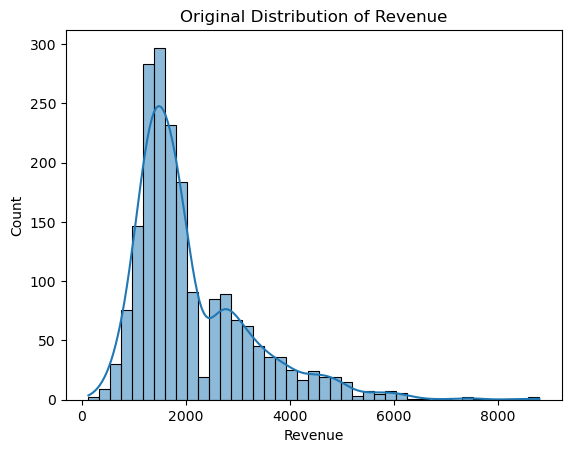

In [65]:
# developing a histogram using HISTPLOT for REVENUE

sns.histplot(data   = chef,
             x      = 'REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [ ]:
#log transforming Revenue and saving it to the dataset
chef['log_REVENUE'] = np.log(chef['REVENUE'])
# developing a histogram using HISTPLOT
sns.histplot(data   = chef,
             x      = 'log_REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithm Distribution of Revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

 Our response variable is skewed, and I will clean this variable to use it in my model.

In [ ]:
# histogram for 
plt.subplot(2, 2, 3)
sns.histplot(data   = chef,
             x      = 'AVG_TIME_PER_SITE_VISIT',
             kde    = True)
plt.show()

# histogram for
plt.subplot(2, 2, 3)
sns.histplot(data   = chef,
             x      = 'AVG_PREP_VID_TIME',
             kde    = True)

plt.show()


In [ ]:
########################
# Visual Scatterplots
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['AVG_TIME_PER_SITE_VISIT'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Average time per site visit')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Avg prep video time')
plt.ylabel(ylabel = 'Revenue')

The 'average time per site visit' and 'average prep video time ' exhibit positive skewness, and the presence of outliers in the data makes it difficult to gain a clear understanding of the relationship between these variables and revenue. To guarantee that the information is suitable for analysis, it is required to apply the proper outlier treatment methods.

In [4]:
#cleaning continuous cariable
#for average time per site visit
chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log(chef['AVG_TIME_PER_SITE_VISIT'])
#for average prep video time
chef['log_AVG_PREP_VID_TIME'] = np.log(chef['AVG_PREP_VID_TIME'])
#for revenue
chef['log_REVENUE'] = np.log(chef['REVENUE'])

In [ ]:
# histogram for log avg time per site visit
plt.subplot(2, 2, 3)
sns.histplot(data   = chef,
             x      = 'log_AVG_TIME_PER_SITE_VISIT',
             kde    = True)
plt.show()


In [ ]:
# histogram for logarithm of avg prep video
plt.subplot(2, 2, 3)
sns.histplot(data   = chef,
             x      = 'log_AVG_PREP_VID_TIME',
             kde    = True)

plt.show()

The distribution of our continuous variables appears to be more normal following data cleaning, as we can see from the histogram and scatter plot, making them appropriate for further analysis.

In [ ]:
# histogram for
plt.subplot(2, 2, 3)
sns.histplot(data   = chef,
             x      = 'TOTAL_MEALS_ORDERED',
             kde    = True)

In [ ]:
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['REVENUE'],
                color = 'g')

According to "Statistics for Psychology" by Arthur Aron, Elaine N. Aron, and Elliot J. Coups (5th Edition, 2019), "Interval variables are sometimes treated as if they were continuous variables if the values of the variable are very fine and the distribution is very smooth. In other words, if the number of different values of the variable is very large and the values are very close to each other, then the variable may be treated as a continuous variable."

I will investigate the interval variables to determine if their distributions resemble that of continuous variables, and if so, I will treat them as such for analysis.

In [ ]:
# histogram and scatterplot for largerst order siz
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['LARGEST_ORDER_SIZE'],
                y = chef['REVENUE'],
                color = 'g')

# histogram for
plt.subplot(2, 2, 3)
sns.histplot(data   = chef,
             x      = 'LARGEST_ORDER_SIZE',
             kde    = True)

plt.show()

In [ ]:
# histogram and scatterplot for unique meal purch
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['UNIQUE_MEALS_PURCH'],
                y = chef['REVENUE'],
                color = 'g')

# histogram for
plt.subplot(2, 2, 3)
sns.histplot(data   = chef,
             x      = 'UNIQUE_MEALS_PURCH',
             kde    = True)

plt.show()

In [ ]:
# histogram and scatterplot for contact w customer
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['CONTACTS_W_CUSTOMER_SERVICE'],
                y = chef['REVENUE'],
                color = 'g')


plt.subplot(2, 2, 3)
sns.histplot(data   = chef,
             x      = 'CONTACTS_W_CUSTOMER_SERVICE',
             kde    = True)

plt.show()

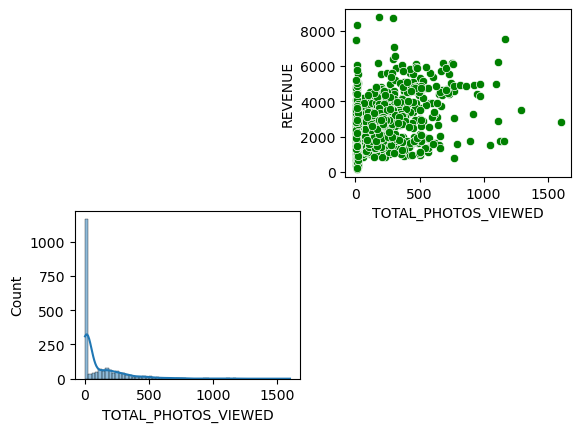

In [28]:
# histogram and scatterplot for total photo viewed
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'],
                y = chef['REVENUE'],
                color = 'g')


plt.subplot(2, 2, 3)
sns.histplot(data   = chef,
             x      = 'TOTAL_PHOTOS_VIEWED',
             kde    = True)

plt.show()


In [ ]:
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['PRODUCT_CATEGORIES_VIEWED'],
                y = chef['REVENUE'],
                color = 'g')

# histogram for
plt.subplot(2, 2, 3)
sns.histplot(data   = chef,
             x      = 'PRODUCT_CATEGORIES_VIEWED',
             kde    = True)

plt.show()

In [ ]:
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['CANCELLATIONS_AFTER_NOON'],
                y = chef['REVENUE'],
                color = 'g')

# histogram for
plt.subplot(2, 2, 3)
sns.histplot(data   = chef,
             x      = 'CANCELLATIONS_AFTER_NOON',
             kde    = True)
plt.show()

In [ ]:
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['PC_LOGINS'],
                y = chef['REVENUE'],
                color = 'g')

# histogram for
plt.subplot(2, 2, 3)
sns.histplot(data   = chef,
             x      = 'PC_LOGINS',
             kde    = True)



In [ ]:
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['MOBILE_LOGINS'],
                y = chef['REVENUE'],
                color = 'g')

# histogram for
plt.subplot(2, 2, 3)
sns.histplot(data   = chef,
             x      = 'MOBILE_LOGINS',
             kde    = True)

plt.show()

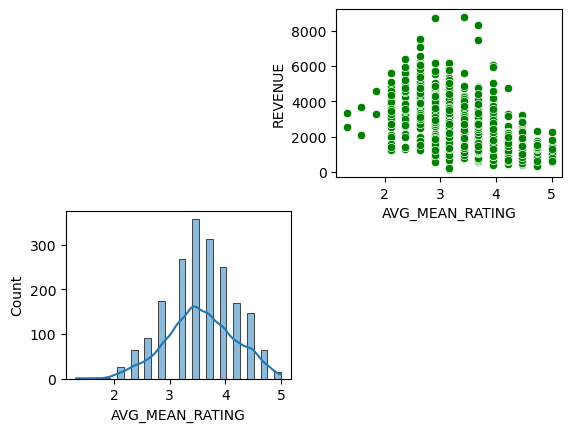

In [34]:
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['AVG_MEAN_RATING'],
                y = chef['REVENUE'],
                color = 'g')

# histogram for
plt.subplot(2, 2, 3)
sns.histplot(data   = chef,
             x      = 'AVG_MEAN_RATING',
             kde    = True)

plt.show()

In [ ]:
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['LATE_DELIVERIES'],
                y = chef['REVENUE'],
                color = 'g')

# histogram for
plt.subplot(2, 2, 3)
sns.histplot(data   = chef,
             x      = 'LATE_DELIVERIES',
             kde    = True)

plt.show()

In [ ]:
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'],
                y = chef['REVENUE'],
                color = 'g')

# histogram for
plt.subplot(2, 2, 3)
sns.histplot(data   = chef,
             x      = 'TOTAL_PHOTOS_VIEWED',
             kde    = True)

plt.show()

Due to the distribution and the scatter plot I will consider total meals ordered and total photo viewed as continuous variable for my predictive model. I can see that both variable are skewed so I proceed and clean those with the logarithm function

In [5]:
#log of total meals ordered and total photos viewed
chef['log_TOTAL_MEALS_ORDERED'] = np.log(chef['TOTAL_MEALS_ORDERED'])
chef['log_TOTAL_PHOTOS_VIEWED'] = np.log(chef['TOTAL_PHOTOS_VIEWED'])

## FEATURE ENGIENERING 

In [32]:
#feature 1 that is the customer engagement score to see how engage are each customer
chef['customer_engagement'] = chef['AVG_TIME_PER_SITE_VISIT'] + chef['CONTACTS_W_CUSTOMER_SERVICE']
#feature 2 that is the proportion of large order out of the total order
chef['Largest order size to Total Orders' ] = chef['LARGEST_ORDER_SIZE'] / chef['TOTAL_MEALS_ORDERED']

This feature represents the proportion of large orders in relation to the total number of orders, and the model suggests that a higher proportion of large orders is associated with higher revenues.

The feature 'customer_engagement' is a composite feature that I created by combining 'CONTACTS_W_CUSTOMER_SERVICE' and 'AVG_TIME_PER_SITE_VISIT'.

## MODEL

In [64]:
#correlation matrix
chef_corr = chef.corr().round(2)


#Pearson correlations with Revenue
chef_corr.loc[ : , ['REVENUE', 'log_REVENUE'] ].sort_values(by = 'REVENUE',
                                                                ascending = False)

,REVENUE,log_REVENUE
REVENUE,1.00,0.95
log_REVENUE,0.95,1.00
customer_engagement,0.65,0.66
AVG_TIME_PER_SITE_VISIT,0.64,0.65
log_AVG_TIME_PER_SITE_VISIT,0.63,0.67
log_TOTAL_MEALS_ORDERED,0.61,0.69
TOTAL_MEALS_ORDERED,0.60,0.61
TOTAL_PHOTOS_VIEWED,0.46,0.43
LARGEST_ORDER_SIZE,0.44,0.45
log_TOTAL_PHOTOS_VIEWED,0.42,0.42


In [53]:
# setting my x variables for my model

x_data_test = ['log_AVG_TIME_PER_SITE_VISIT', 'log_TOTAL_MEALS_ORDERED', 'log_TOTAL_PHOTOS_VIEWED', 'LARGEST_ORDER_SIZE',
              'CONTACTS_W_CUSTOMER_SERVICE', 'log_AVG_PREP_VID_TIME', 'AVG_MEAN_RATING', 'customer_engagement', 'Largest order size to Total Orders', 'UNIQUE_MEALS_PURCH']

x_t = chef.loc[:, x_data_test]
# preparing y for my model
y_data = chef.loc[ : , 'REVENUE']    # normal y variable 
log_y_data = chef.loc[ : , 'log_REVENUE'] # logarithm y variable

It's critical to choose the variables that have the strongest correlation with revenue in order to develop a model that can predict revenue effectively. I used the dataset's correlation analysis to find these attributes. I discovered that a number of factors, including the biggest order size, the typical duration of a site visit, and the typical length of a prep video, had a largely positive relationship with revenue. These variables and others were chosen for the model based on this analysis.

I excluded categorical data from my model. Although some of these factors can affect revenue, I figured they wouldn't have as much of an impact as the constant factors. This approach allowed me to identify the most important features for revenue.



In [54]:
x_train, x_test, y_train, y_test = train_test_split(
            x_t, 
            log_y_data, 
            test_size    = 0.25,
            random_state = 219)

In [66]:

#model name
model_name = 'Pruned Random Forest'


# instantiating a random forest model 
model = RandomForestRegressor(n_estimators     = 500,
                              criterion        = 'mse',
                              max_depth        = 12,
                              min_samples_leaf = 16,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 219)


# fitting the training data
model_fit = model.fit(x_train, y_train)


# model prediction object based on the testing set
model_pred = model.predict(x_test)


# scoring results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


RandomForest =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}"""


print(f"""

------------------
FINAL MODEL
-------------------

{RandomForest}""")

C:\Users\Kevin Kabore\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(




------------------
FINAL MODEL
-------------------

Model Name:     Pruned Random Forest
Train_Score:    0.8326
Test_Score:     0.7898
Train-Test Gap: 0.0428


   With a relatively small difference between the training and testing scores of 0.7898 and 0.8326, respectively, the model is functioning well. The testing score measures how effectively the model generalizes to fresh, untested data, whereas the training score measures how well the model fits the training data. The testing score should ideally be as high as possible without overfitting the model to the training set of data.

The train-test gap, is 0.0428, which is likewise acceptable. The model may be overfitting the training set of data if the gap is too wide, and it may not be generalizing adequately to fresh data.
Overall, these scores suggest that the model is performing well and has found a good balance between underfitting and overfitting.
  
The 'customer engagement' variable seems to be one of the model's most crucial elements. This function measures the total level of client engagement with the service. High levels of customer involvement may be a sign that customers are satisfied with the product and are likely to come back for more or refer others to it. Low levels of involvement, on the other hand, can signify dissatisfied customers, which might eventually result in declining sales.

Another important feature is 'Largest order size to Total Orders', which represents the proportion of a customer's total orders that were the largest order.
Customers' purchasing behavior may be tracked by this feature, as individuals who frequently place large orders may be more valuable to the company than those who frequently place small orders. Customers who make big orders could also be more likely to place big orders in the future, which might result in longer-term increases in income.

Other important features in your model include 'log_AVG_TIME_PER_SITE_VISIT', 'log_TOTAL_MEALS_ORDERED', 'CONTACTS_W_CUSTOMER_SERVICE', 'log_TOTAL_PHOTOS_VIEWED', 'LARGEST_ORDER_SIZE', 'log_AVG_PREP_VID_TIME', 'AVG_MEAN_RATING', and 'UNIQUE_MEALS_PURCH'. These features capture other important aspects of customer behavior and engagement with the service.

## Business Insight

The customer engagement feature appears to be one of the most important in your model. This suggests that the business should focus on improving overall customer engagement with the service. 
The company can implement several strategies to incentivize customers to continue using the service.
The company should take advantage of using personalized marketing strategies such as personalized promotions to maintain and enhance their customers’ engagement.
For example, they could offer personalized recommendations based on customer preferences.
 Customer engagement could also be improved by providing prompt and efficient customer service to address any issues or concerns. The company could also consider implementing a loyalty program such as discounts, free products, or exclusive access to events or promotions. This is intended to reward customers for their continued fidelity to the business (source: "The Benefits of Implementing a Customer Loyalty Program" by HubSpot: https://blog.hubspot.com/service/customer-loyalty-program).

As a result, these strategies will help to build a sense of community and a strong relationship between the company and its customers. The more engaged customers are with the company, the more likely they are to spend money on the company's products and services (source: "The Impact of Customer Engagement on Business Performance" by Forbes: https://www.forbes.com/sites/forbesbusinessdevelopmentcouncil/2019/08/01/the-impact-of-customer-engagement-on-business-performance/?sh=6af6cd501b9f).

Something else to understand is that while it is important to attract new customers, retaining existing ones can be even more valuable in the long run. Therefore, instead of investing solely on acquiring new customers, the company should also prioritize customer retention. This could be achieved by providing excellent customer experiences that encourage customers to return and become frequent buyers. 
Then, this leads us to our second insight which is to improve customer service. According to my analysis, customer service has a positive relationship with revenue. Improving customer service could involve investing in additional customer service resources, improving response times, offering 24/7 customer service, and encouraging customer feedback so that we may better understand their needs.

In addition, my analysis suggests that customers who make larger orders are more valuable to the business, meaning that there is a greater profit on these kinds of sales. Encouraging larger orders could include strategies like offering discounts on larger orders or promoting products that are frequently purchased in large quantities.

Additionally, the model suggests that the average prep video time has a significant positive impact on revenue. This indicates that customers who are more engaged with the cooking videos are more likely to spend money on the company's products and services. One actionable business insight that can be derived from this is that the company could consider offering more cooking resources, such as recipes, cooking videos, or tutorials, to engage customers and encourage them to purchase more products.

Overall, the insights derived from the model can help the company optimize its marketing and sales strategies by identifying the key factors that influence customer spending behavior. By implementing targeted strategies to improve customer engagement, customer service, encourage larger orders, and provide cooking resources, the company can increase its revenue and build stronger relationships with its customers.